In [2]:

from random import sample

import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
import numpy as np
from keras.layers import Dense, Input, Concatenate, Lambda, Flatten, Dropout
from keras.utils.vis_utils import plot_model
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import keras.backend as K
from sklearn.metrics import f1_score
import json
from keras.utils import np_utils
import copy
import src.bbobbenchmarks as bbob
from scipy.stats import qmc
import matplotlib.pyplot as plt

(1024, 2)


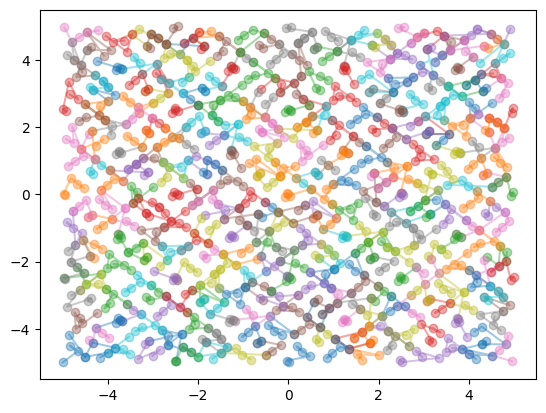

100


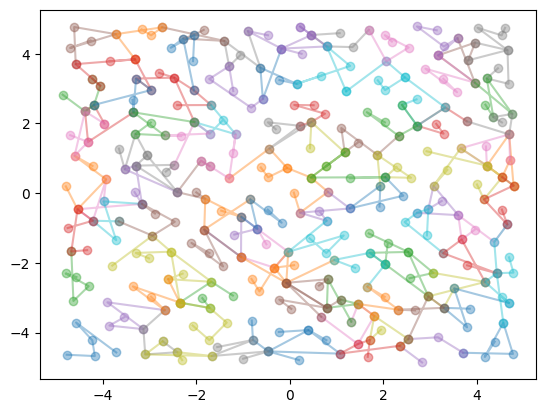

In [11]:


dim = 2
k = dim * 2 + 1
overlap = False
m = 10
#DOE

sampler = qmc.Sobol(d=dim, scramble=False, seed=42)
sample = sampler.random_base2(m=m)
sample = sample * 10 - 5
locations = sample
locations = np.array(locations)
print(locations.shape)

sample_size = len(sample)
output_size = sample_size

fun, opt = bbob.instantiate(3, 0)
bbob_y = np.asarray(list(map(fun, sample)))
array_x = (bbob_y.flatten() - np.min(bbob_y)) / (
    np.max(bbob_y) - np.min(bbob_y)
)

pair_distances = pairwise_distances(locations, metric='cityblock')
if (overlap):
    connections = np.zeros((sample_size, sample_size))
    new_locations = np.zeros((sample_size,dim))
    for i in range(0,len(locations)):
        indexes_to_use = np.argsort(pair_distances[i,:])[:k]
        connections[indexes_to_use, i] = 1
        new_locations[i] = np.mean(locations[indexes_to_use], axis=0)
else:
    indexes_used = np.zeros(len(locations), dtype=bool)
    groups = []
    for i in range(0,len(locations)):
        if (not indexes_used[i]):
            pair_distances = pairwise_distances(locations, metric='cityblock')
            #update the used indexes
            indexes_to_use = np.argsort(pair_distances[i,:])[:k]
            indexes_used[indexes_to_use] = True
            groups.append(indexes_to_use)
    connections = np.zeros((sample_size, len(groups)))
    new_locations = np.zeros((len(groups),dim))
    for i in range(0,len(groups)):
        connections[groups[i], i] = 1
        new_locations[i] = np.mean(locations[groups[i]], axis=0)
        plt.plot(locations[groups[i],0],locations[groups[i],1], '-o', alpha=0.4)
    output_size = len(groups)
plt.show()
#tf_connections = tf.convert_to_tensor(connections, dtype=tf.float32)
plt.clf()
#second layer
locations = new_locations
pair_distances = pairwise_distances(locations, metric='cityblock')
indexes_used = np.zeros(len(locations), dtype=bool)
groups = []
for i in range(0,len(locations)):
    if (not indexes_used[i]):
        pair_distances = pairwise_distances(locations, metric='cityblock')
        #update the used indexes
        indexes_to_use = np.argsort(pair_distances[i,:])[:k]
        indexes_used[indexes_to_use] = True
        groups.append(indexes_to_use)
connections = np.zeros((sample_size, len(groups)))
new_locations = np.zeros((len(groups),dim))
for i in range(0,len(groups)):
    connections[groups[i], i] = 1
    new_locations[i] = np.mean(locations[groups[i]], axis=0)
    plt.plot(locations[groups[i],0],locations[groups[i],1], '-o', alpha=0.4)
output_size = len(groups)
print(output_size)
plt.show()